# <font color = green|><b><p style='text-align:center'>Assignment 05

### <b>1.Build a linear regression which predicts the land price using both the land_area and the distance_to_city feature. (See the dataset in ‘land_price_1.csv’)

In [1]:
import torch
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('land_price_1.csv')
df

,land_area,dist_to_city,price
0,122,12.9,15.7
1,173,18.4,11.3
2,341,11.0,42.0
3,439,19.3,35.0
4,477,19.7,37.7
5,597,7.1,75.5
6,682,10.2,77.1
7,794,10.0,88.7
8,912,0.1,122.0
9,1001,5.7,119.1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   land_area     30 non-null     int64  
 1   dist_to_city  30 non-null     float64
 2   price         30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


### a.) Descriptive statistics of feature and target

In [4]:
df.describe()

,land_area,dist_to_city,price
count,30.000000,30.00000,30.000000
mean,1546.933333,10.01000,164.753333
std,880.330421,6.17896,90.454369
min,122.000000,0.10000,11.300000
25%,823.500000,4.72500,96.300000
50%,1557.500000,9.90000,169.700000
75%,2251.000000,14.82500,230.425000
max,3026.000000,19.70000,324.700000


### b.) Check variable distribution

<AxesSubplot: title={'center': 'land area'}>

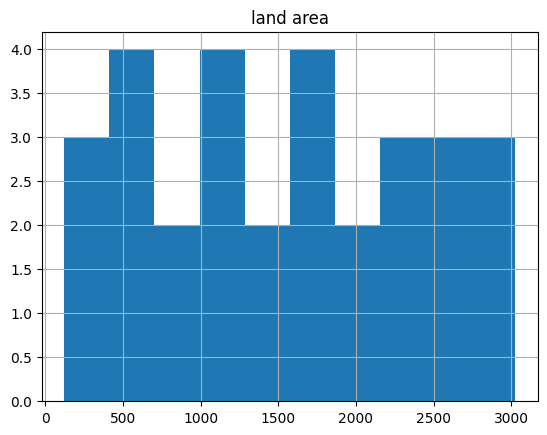

In [5]:
plt.title('land area')
df['land_area'].hist()

<AxesSubplot: title={'center': 'dist_to_city'}>

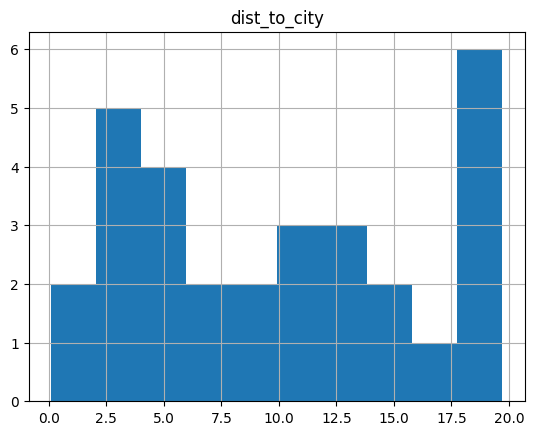

In [6]:
plt.title('dist_to_city')
df['dist_to_city'].hist()

<AxesSubplot: title={'center': 'price'}>

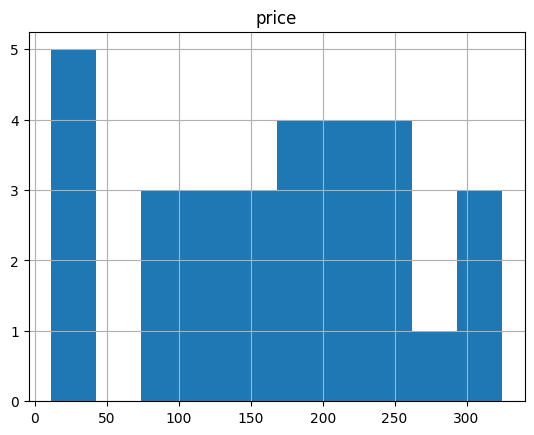

In [7]:
plt.title('price')
df['price'].hist()

### c.) Check feature relationship

In [8]:
x = torch.tensor(df['land_area'].values)
x 

tensor([ 122,  173,  341,  439,  477,  597,  682,  794,  912, 1001, 1081, 1203,
        1255, 1355, 1465, 1650, 1707, 1768, 1863, 2015, 2133, 2158, 2282, 2423,
        2496, 2575, 2679, 2846, 2890, 3026])

In [9]:
y = torch.tensor(df['dist_to_city'].values)
y

tensor([12.9000, 18.4000, 11.0000, 19.3000, 19.7000,  7.1000, 10.2000, 10.0000,
         0.1000,  5.7000,  5.8000,  2.5000,  3.0000,  9.8000,  2.5000, 12.9000,
        12.2000, 18.4000,  3.0000,  5.9000,  6.2000, 14.6000, 14.9000, 16.7000,
        17.9000,  3.8000, 19.6000,  9.8000,  2.0000,  4.4000],
       dtype=torch.float64)

In [10]:
z = torch.tensor(df['price'].values)
z 

tensor([ 15.7000,  11.3000,  42.0000,  35.0000,  37.7000,  75.5000,  77.1000,
         88.7000, 122.0000, 119.1000, 125.6000, 145.5000, 150.0000, 145.0000,
        172.0000, 170.0000, 177.0000, 169.4000, 211.0000, 220.0000, 231.4000,
        216.9000, 227.5000, 239.4000, 244.3000, 279.8000, 259.5000, 295.4000,
        314.1000, 324.7000], dtype=torch.float64)

In [11]:
# correlation coefficient table 
df.corr()

,land_area,dist_to_city,price
land_area,1.000000,-0.113963,0.990622
dist_to_city,-0.113963,1.000000,-0.248468
price,0.990622,-0.248468,1.000000


According to correlation coefficient table, we see that : price and land_area has highest correlation to each other

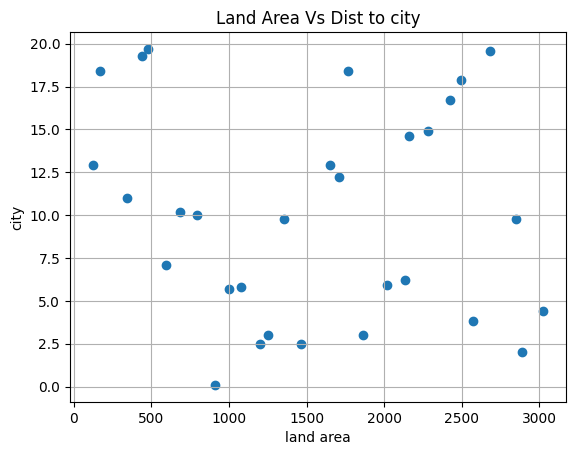

In [12]:
fig, ax = plt.subplots()
plt.title('Land Area Vs Dist to city')
plt.xlabel('land area')
plt.ylabel('city')
plt.grid()
_ = ax.scatter(x, y)

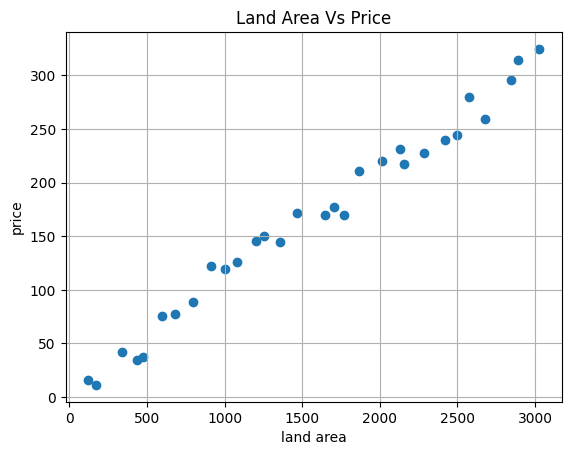

In [13]:
plt.title('Land Area Vs Price')
plt.xlabel('land area')
plt.ylabel('price')
plt.grid()
plt.scatter(x,z)
plt.show()

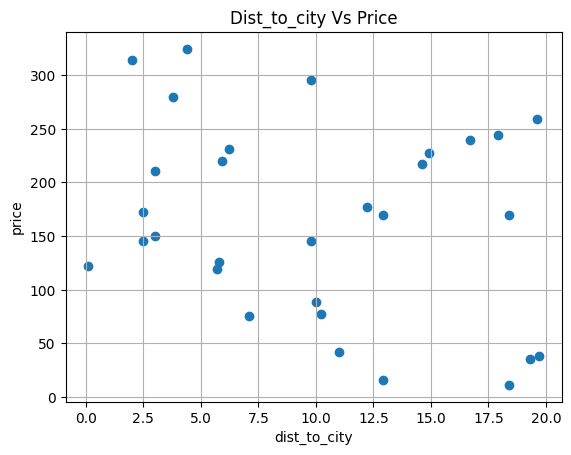

In [14]:
plt.title('Dist_to_city Vs Price')
plt.xlabel('dist_to_city')
plt.ylabel('price')
plt.grid()
plt.scatter(y,z)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


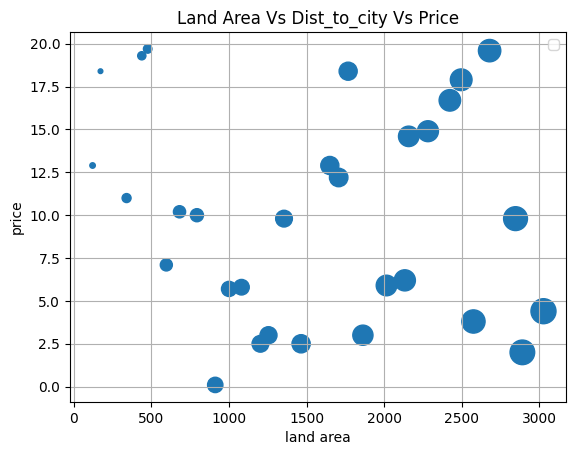

In [15]:
plt.title('Land Area Vs Dist_to_city Vs Price')
plt.xlabel('land area')
plt.ylabel('price')
plt.grid()
plt.scatter(x,y,z)
plt.legend()
plt.show()

<font color = green|>Base to scatterplot above, we can see that price of land has strong positive relationship to land area. Therefore, we conclude that price of land increase or decrease depending on land area.

#### Predict price of house

In [21]:
from sklearn.linear_model import LinearRegression

# Create a dataframe from the given data
# Separate the independent variables (features) and the dependent variable (target)
X = df[['land_area', 'dist_to_city']]
y = df['price']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict land prices for new data
new_data = {
    'land_area': [2000, 2500, 3000],
    'dist_to_city': [8.5, 15.0, 5.0]
}
new_df = pd.DataFrame(new_data)
predicted_prices = model.predict(new_df)

result_df = pd.DataFrame({'land_area': new_data['land_area'],
                          'dist_to_city': new_data['dist_to_city'],
                          'predicted_prices': predicted_prices})
result_df

,land_area,dist_to_city,predicted_prices
0,2000,8.5,213.177142
1,2500,15.0,250.196238
2,3000,5.0,320.393356


`Therefore, the price of house can be occurr [213.17714211, 250.19623767, 320.39335581], while we want to test these two features:`
- `land_area : [2000, 2500, 3000]`
- `dist_to_city : [8.5, 15.0, 5.0]`

### <b>2.) Using only the distance feature, build a model with hypothesis to predict the land price. (See the dataset in ‘land_price_2.csv’)

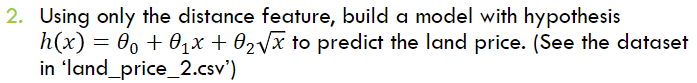

In [22]:
df2 = pd.read_csv('land_price_2.csv')
df2.head(7)

,dist_to_city,land_area,price
0,12.9,129,140.9
1,18.4,214,200.3
2,11.0,343,280.4
3,19.3,387,298.8
4,19.7,454,358.2
5,7.1,565,414.3
6,10.2,675,484.2


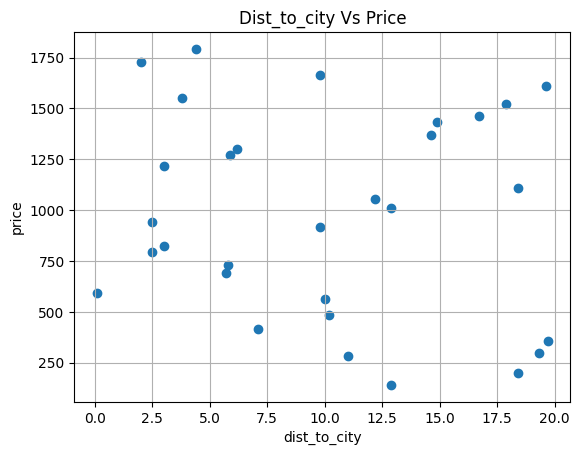

In [29]:
plt.title('Dist_to_city Vs Price')
plt.xlabel('dist_to_city')
plt.ylabel('price')
plt.grid()
plt.scatter(df2['dist_to_city'],df2['price'])
plt.show()

In [30]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Create a dataframe from the given data
# Separate the independent variable (feature) and the dependent variable (target)
X = df2[['dist_to_city']]
y = df2['price']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients and intercept of the model
theta_0 = model.intercept_
theta_1 = model.coef_[0]

# Print the coefficients and intercept
print("Theta_0 (intercept):", theta_0)
print("Theta_1 (coefficient):", theta_1)

Theta_0 (intercept): 1077.010959829553
Theta_1 (coefficient): -9.925836812809168


`Therefore, the model that fit to house price prediction is defined by : `
$$

$$

In [28]:
from sklearn.linear_model import LinearRegression

# Separate the independent variable (feature) and the dependent variable (target)
X = df2[['dist_to_city']]
y = df2['price']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the land prices
predicted_prices = model.predict(X)

# Print the predicted values
for i, price in enumerate(predicted_prices):
    result_df = pd.DataFrame({'i': i,'predicted_prices': predicted_prices})
result_df

,i,predicted_prices
0,29,948.967665
1,29,894.375562
2,29,967.826755
3,29,885.442309
4,29,881.471975
5,29,1006.537518
6,29,975.767424
7,29,977.752592
8,29,1076.018376
9,29,1020.433690


# <font color = green|><b><p style='text-align:center'>The End